# グラフ導入の参考
[matplotlibで折れ線グラフを描く](https://pythondatascience.plavox.info/matplotlib/%E6%8A%98%E3%82%8C%E7%B7%9A%E3%82%B0%E3%83%A9%E3%83%95)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pickle

In [18]:
def IL_show(IL_dict):
    formatted_dict = deepcopy(IL_dict)
    for water_len in formatted_dict.keys():
        formatted_dict[water_len] = np.mean(formatted_dict[water_len])
        
    left = np.array(list(formatted_dict.keys()))
    height = np.array(list(formatted_dict.values()))
    
    plt.plot(left, height)
    plt.xlabel('length of watermark')
    plt.ylabel('IL of watermarked data')
    plt.grid(True)

In [3]:
def IL_show_from_pickle(IL_dict_pickle):
    with open(IL_dict_pickle, 'rb') as f:
        IL_dict = pickle.load(f)
    IL_show(IL_dict)

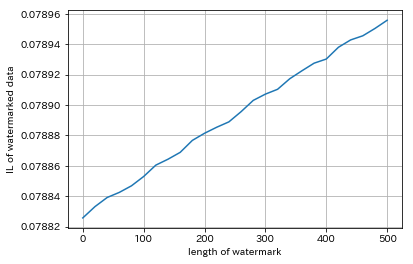

In [19]:
IL_show_from_pickle('../result/new_IL_results_proposal_embedding_500.pkl')

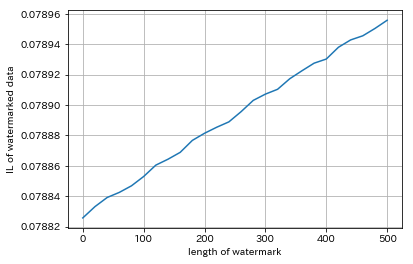

In [5]:
IL_show_from_pickle('../result/new_IL_results_proposal_500.pkl')

In [25]:
def IL_show(IL_dict_l, legend_l):
    # linestyles = ['solid', 'dashed', 'dashdot', 'dotted'] 
    linestyles = ['solid', 'solid', 'solid', 'solid']
    markers = ['o', '^', 's', 'v']
    
    formatted_dict_l = deepcopy(IL_dict_l)
    p_l = list()
    for i, formatted_dict in enumerate(formatted_dict_l):
        for water_len in formatted_dict.keys():
            formatted_dict[water_len] = np.mean(formatted_dict[water_len])

        left = np.array(list(formatted_dict.keys()))
        height = np.array(list(formatted_dict.values()))
        
        p_l.append(plt.plot(left, height, linewidth=2, linestyle=linestyles[i], marker=markers[i]))
    
    plt.xlabel('length of watermark')
    plt.ylabel('IL of watermarked data')
    plt.legend([x[0] for x in p_l], legend_l, loc=2)
    plt.grid(True)

In [9]:
def load_pickle(pf):
    with open(pf, 'rb') as f:
        return pickle.load(f)

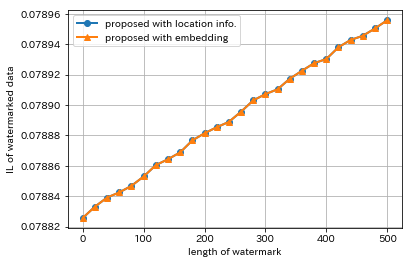

In [27]:
result_dict_list = list()
result_dict_list.append(load_pickle('../result/new_IL_results_proposal_500.pkl'))
result_dict_list.append(load_pickle('../result/new_IL_results_proposal_embedding_500.pkl'))
legend_l = ['proposed with location info.', 'proposed with embedding']
IL_show(result_dict_list, legend_l)

In [11]:
result_dict_list = list()
result_dict_list.append(load_pickle('../result/IL_results_general_proposal_500.pkl'))
result_dict_list.append(load_pickle('../result/IL_results_general_proposal_embedding_500.pkl'))
legend_l = ['proposed with location info.', 'proposed with embedding']
IL_show(result_dict_list, legend_l)

FileNotFoundError: [Errno 2] No such file or directory: '../result/IL_results_general_proposal_500.pkl'

In [14]:
result_dict_list = list()
result_dict_list.append(load_pickle('../result/new_IL_results_proposal_500.pkl'))
keys = list(result_dict_list[-1].keys())
for key in keys:
    if key > 300:
        result_dict_list[-1].pop(key)
result_dict_list.append(load_pickle('../result/new_IL_results_proposal_embedding_500.pkl'))
keys = list(result_dict_list[-1].keys())
for key in keys:
    if key > 300:
        result_dict_list[-1].pop(key)
result_dict_list.append(load_pickle('../result/new_IL_results_existing_300.pkl'))
legend_l = ['proposed with location info.', 'proposed with embedding', 'existing method']

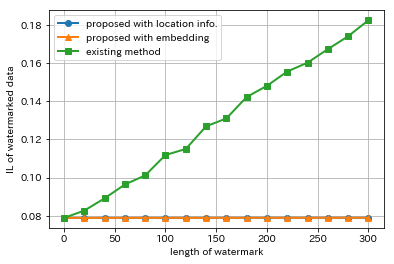

In [26]:
IL_show(result_dict_list, legend_l)